## **Linear Regression.**

1. Simple Linear Regression:

$$y\approx\hat{y} = f(\textbf{x}) = w_1x_1 + w_2x_2 + w_3x_3 = \textbf{x}^T\textbf{w}$$

In there:
+ $y$ is the actual output value.
+ $\hat{y}$ is the output prediction value.
+ $\textbf{x} = [x_1, x_2, x_3]^T$ is the feature vector.
+ $\textbf{w} = [w_1, w_2, w_3]$ is weight vector.

Text(0, 0.5, 'Weight (kg)')

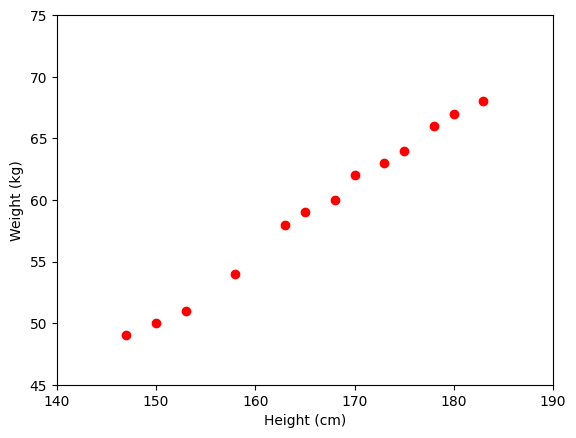

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# height (cm)
X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T # each row is a point

# weight (kg)
y = np.array([ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68])

# Visualize data
plt.plot(X, y, 'ro')
plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')

2. Bias trick:

$$y = \textbf{x}^T\textbf{w} + b$$

In which, $b$ is the free term, also known as *bias*. If we consider $x_0 = 1$ then we will have:

$$y\approx\hat{y} = f(\textbf{x}) = w_1x_1 + w_2x_2 + \ldots + w_Nx_N + bx_0 = \overline{\textbf{x}}^T\overline{\textbf{w}}$$

Where $\overline{\textbf{x}} = [x_0, x_1, x_2, \ldots, x_N]^T$ and $\overline{\textbf{w}} = [b, w_1, w_2, \ldots, w_N]$. This is Multiple Linear Regression.

3. Cost function and solution for the Linear Regression problem:

+ Cost function:

$$\mathcal{L}(\textbf{w}) = \frac{1}{2N}\sum_{i=1}^{N}(y_i - \textbf{x}_i^T\textbf{w})^2 = \frac{1}{2N}||\textbf{y} - \textbf{X}^T\textbf{w}||^2_2$$

Our goal is to find $\textbf{w}$ such that function $\mathcal{L}(\textbf{w})$ is least expensive: $\hat{\textbf{w}} = {\underset{\textbf{w}}{\operatorname{arg\,min}}}\mathcal{L}(\textbf{w})$

+ Solution for the Linear Regression problem:

$$\textbf{w} = (\textbf{X}\textbf{X}^T)^{\dagger}\textbf{Xy}$$

Where $\textbf{y} = [y_1, y_2, \ldots, y_N]^T$ and $\textbf{X} = [\textbf{x}_1, \textbf{x}_2, \ldots, \textbf{x}_N].$

If matrix $\textbf{X}\textbf{X}^T$ is invertible then $(\textbf{X}\textbf{X}^T)^{\dagger} = (\textbf{X}\textbf{X}^T)^{-1}$, otherwise $\textbf{X}\textbf{X}^T$ is determined based on the pseudo-inverse $(\textbf{X}\textbf{X}^T)^{\dagger}$. In Python, the pseudo-inverse has the syntax of `numpy.linalg.pinv`.

Text(0, 0.5, 'Weight (kg)')

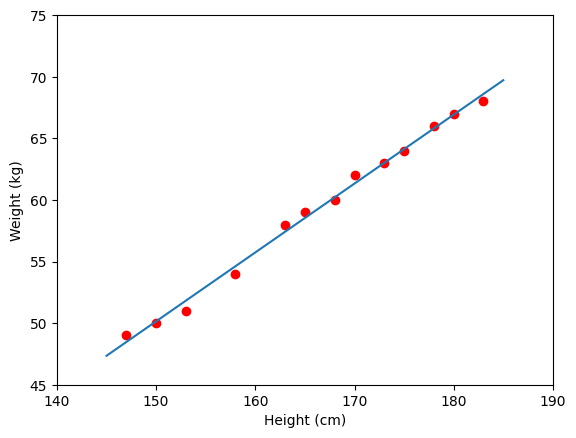

In [2]:
# Building Xbar and use bias trick
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1) # each point is one row

# Calculating weights of the fitting line
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)

# weights
w_0 = w[0]
w_1 = w[1]

x0 = np.linspace(145, 185, 2, endpoint=True)
y0 = w_0 + w_1 * x0

# Drawing the fitting line
plt.plot(X, y, 'ro') # data
plt.plot(x0, y0) # the fitting line
plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')

In [9]:
y1 = w_1 * 155 + w_0
y2 = w_1 * 160 + w_0

print('Input 155cm, true output 52kg, predicted output %.2fkg'  %(y1))
print('Input 160cm, true output 56kg, predicted output %.2fkg'  %(y2))

Input 155cm, true output 52kg, predicted output 59.07kg
Input 160cm, true output 56kg, predicted output 60.26kg


We see that the predicted results are quite close to the actual data.

Next, we will use Python's `scikit-learn` library to find the solution:

In [4]:
from sklearn import datasets, linear_model

regr = linear_model.LinearRegression()
regr.fit(X, y)

# Compare two results
print("scikit-learn's solution  : w_1 = ", regr.coef_[0], ", w_0 = ", regr.intercept_)
print("our solution             : w_1 = ", w[1], ", w_0 = ", w[0])

scikit-learn's solution  : w_1 =  0.5592049619396674 , w_0 =  -33.73541020580774
our solution             : w_1 =  0.5592049619425978 , w_0 =  -33.735410206298866


***Linear Regression is very sensitive to noise:*** In the case of noise, with a pair of data (150 cm, 70 kg), the results are greatly skewed.

w =  [22.21867545  0.23775985]


Text(0, 0.5, 'Weight (kg)')

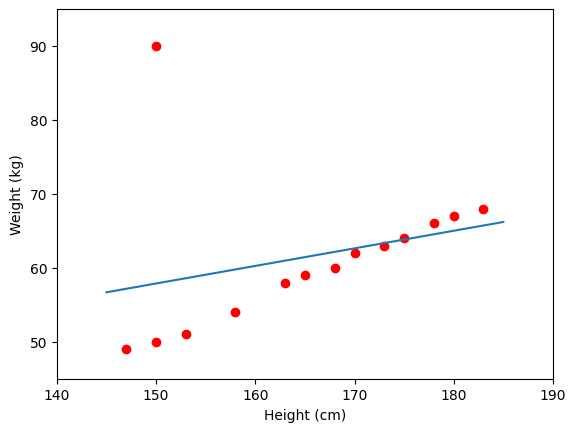

In [5]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183, 150]]).T

y = np.array([ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68, 90])

one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)

A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)
print('w = ', w)
w_0 = w[0]
w_1 = w[1]

x0 = np.linspace(145, 185, 2, endpoint=True)
y0 = w_0 + w_1*x0

plt.plot(X, y, 'ro')
plt.plot(x0, y0)
plt.axis([140, 190, 45, 95])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')

## **Polynomial Regression.**

Polynomial Regression is more commonly used with feature vectors of the form $[1, x_1, x_1^2, \ldots]^T$, consider $x_0 = 1$:

$$y\approx\hat{y} = f(\textbf{x}) = w_1x_1 + w_2x_1^2 + \ldots + w_Nx_1^N + bx_0$$

w =  [[-70.86022078  78.7687132  -28.99387406   3.4286372 ]]


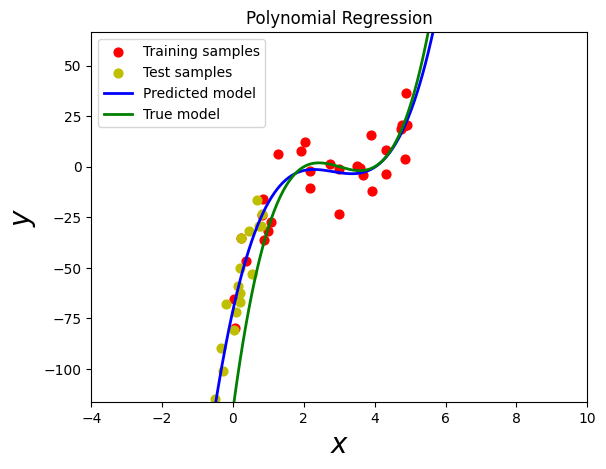

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

np.random.seed(4)

N = 30
N_test = 20

# Trainging set
X = np.random.rand(N, 1) * 5
y = 3 * (X - 2) * (X - 3) * (X - 4) + 10 * np.random.randn(N, 1)

# Test set
X_test = (np.random.rand(N_test, 1) - 1/2) * 2
y_test = 3 * (X_test - 2) * (X_test - 3) * (X_test-4) +  10 * np.random.randn(N_test, 1)

# Construct the matrix Xbar = [1, X, X^2, X^3, .... , X^d]^T
def buildX(X, d = 2):
  res = np.ones((X.shape[0], 1))
  for i in range(1, d + 1):
    res = np.concatenate((res, X**i), axis=1)
  return res

def myFit(X, y, d):
  Xbar = buildX(X, d)
  regr = linear_model.LinearRegression(fit_intercept=False)
  """
  In Python's `linear_model.LinearRegression` function, the `fit_intercep`t parameter is used to determine whether the model should calculate an intercept value.
    + If `fit_intercept=True` (default), the model will calculate the intercept. In this case, the data does not need to be centered.
    + If `fit_intercept=False`, the model does not calculate the intercept and the data is assumed to be centered. This means the model will pass through the origin.
  """
  regr.fit(Xbar, y)

  w = regr.coef_
  print('w = ', w)

  x0 = np.linspace(-1, 7, 200, endpoint=True)
  y0 = np.zeros_like(x0)
  for i in range(d + 1):
    y0 += w[0][i] * x0**i
  ytrue = 5 * (x0 - 2) * (x0 - 3) * (x0 - 4)

  # Draw the fitting line
  plt.scatter(X.T, y.T, c = 'r', s = 40, label='Training samples')
  plt.scatter(X_test.T, y_test.T, c = 'y', s = 40, label='Test samples')
  plt.plot(x0, y0, 'b', linewidth = 2, label="Predicted model")
  plt.plot(x0, ytrue, 'g', linewidth = 2, label="True model")
  plt.title('Polynomial Regression')
  plt.legend()
  plt.axis([-4, 10, np.amax(y_test) - 100, np.amax(y) + 30])
  plt.xlabel('$x$', fontsize = 20)
  plt.ylabel('$y$', fontsize = 20)

myFit(X, y, 3) # In this case, we just consider d = 3

Use functions available from Python:

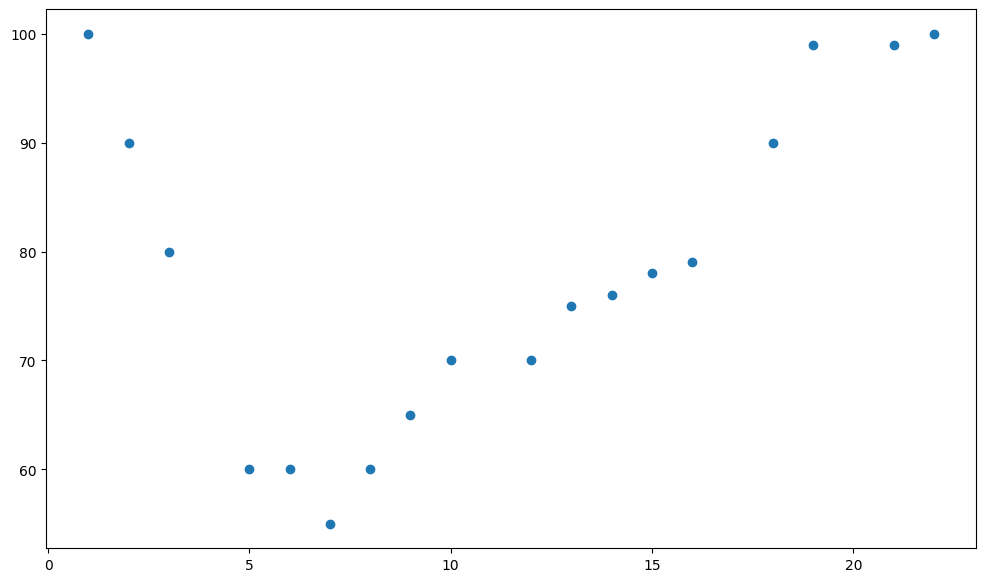

In [18]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 18, 19, 21, 22]
y = [100, 90, 80, 60, 60, 55, 60, 65, 70, 70, 75, 76, 78, 79, 90, 99, 99, 100]

plt.figure(figsize=(12, 7))
plt.scatter(x, y)
plt.show()

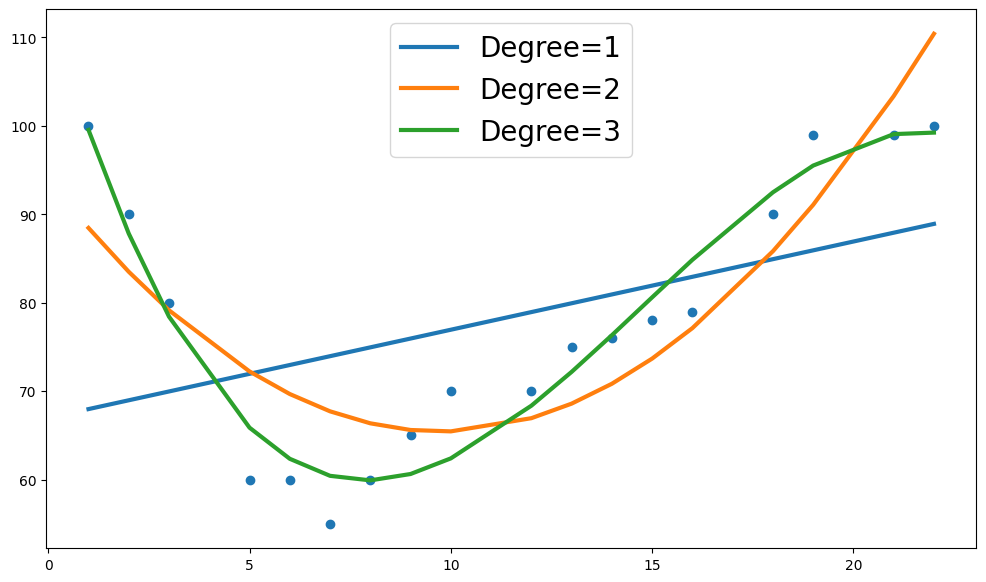

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)

degrees = [1, 2, 3]

plt.figure(figsize=(12, 7))
plt.scatter(X, y)

for d in degrees:
    pipeline = Pipeline([
        ("polynomial_features", PolynomialFeatures(degree=d)),
        ("regressor", LinearRegression()),
    ])

    pipeline.fit(X,y)
    plt.plot(X, pipeline.predict(X), label=f'Degree={d}', linewidth=3)    

plt.legend(loc='upper center', fontsize=20)
plt.show()

The `Pipeline` function in the above code is a powerful tool in the `scikit-learn` library to build a sequence of data processing and modeling steps. It allows you to combine multiple data processing and modeling steps into a single object, creating an automated and easily reusable process.

In this case, `Pipeline` is used to build a two-step process. The first step is `PolynomialFeatures`, a data processing step to create polynomial features from the original data. This step uses the `PolynomialFeatures` object from the `scikit-learn` library and is configured with a polynomial degree d. The second step is `LinearRegression`, a linear regression model to predict the output value based on the generated features.

When `pipeline.fit(X, y)` is called, the pipeline will be executed. The input data `X` and `y` are passed into the `pipeline`, and it automatically performs the data processing and modeling steps in the order determined. As a result, a linear regression model was trained on the processed data.

### **Ridge and Lasso.**

In case the matrix $\textbf{XX}^T$ is not invertible, we will use a small technique to turn the matrix $\textbf{XX}^T$ into a matrix $\textbf{A} = \textbf{XX}^ T + \lambda\textbf{I}$, where $\lambda$ is a very small positive number and $\textbf{I}$ is an identity matrix with appropriate order.

The matrix $\textbf{A}$ is invertible because it is positive definite. Indeed, for every $\textbf{w}\neq0$ then

$$\textbf{w}^T\textbf{A}\textbf{w} = \textbf{w}^T(\textbf{XX}^T + \lambda\textbf{I})\textbf{w} = \textbf{w}^T\textbf{XX}^T\textbf{w} + \lambda\textbf{w}^T\textbf{w} = ||\textbf{X}^T\textbf{w}|| _2^2 + \lambda||\textbf{w}||^2_2 > 0$$

Consider the loss function:

$$\mathcal{L}_2(\textbf{w}) = \frac{1}{2N}||\textbf{y} - \textbf{X}^T\textbf{w}||^2_2 + \lambda||\textbf{w}||_2^2$$

With the differential equation with respect to $\textbf{w}$ being zero, the solution for the minimal problem $\mathcal{L}_2(\textbf{w})$ is $\textbf{w} = (\textbf{XX}^T + \lambda\textbf{I})^{-1}\textbf{X}\textbf{y}$. This Machine Learning model is called ***Ridge regression***.

This is a common regularization technique that adds an additional term to the loss function. This term is often used to evaluate algorithmic complexity with a large value representing a complex model. This loss function is called **regularized loss function**, defined as follows:

$$\mathcal{L}_{reg}(\theta) = \mathcal{L}(\theta) + \lambda\mathcal{R}(\theta)$$

In there:

+ $\theta:$ denotes parameters in the model.
+ $\mathcal{L}(\theta):$ loss function depends on training set and $\theta$.
+ $\mathcal{R}(\theta):$ the regularization term depends only on $\theta$.
+ $\lambda$: small positive integer, also known as regularization
parameter. parameter.

Two popular regularization functions that are often chosen are $l_1\ norm$ and $l_2\ norm$ regularization.

For example, when choosing $\mathcal{R}(\theta) = ||\textbf{w}||_2^2$ for the loss function of Linear Regression, we achieve Ridge Regression. This regularization function makes the coefficients $\textbf{w}$ not too large, helping to avoid the output depending too much on a certain feature.

Meanwhile, when choosing $\mathcal{R}(\theta) = ||\textbf{w}||_1$, the solution $\textbf{w}$ tends to have many zero elements (sparse solution). When we add $l_1$ regularization to the loss function of Linear Regression, we obtain ***Lasso Regression***. The non-zero components of $\textbf{w}$ are equivalent to important features that contribute to the prediction of the output, otherwise less important. This is a *feature selection* method.

In [2]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y=True) # `return_X_y=True`: returns `(data, target)`` instead of a bunch object.
features = load_diabetes()['feature_names']

In [3]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [4]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [5]:
features

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

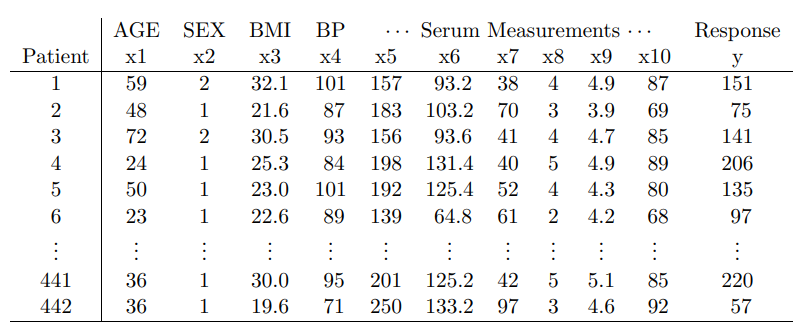

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.linear_model import Ridge

reg_ridge = Ridge(alpha=1.0)
reg_ridge.fit(X_train, y_train)

# Model training error on the training set.
print("R2-Score: ", reg_ridge.score(X_train, y_train))

# Regression coefficient
print("Coef: ", reg_ridge.coef_)
print("Intercept: ", reg_ridge.intercept_)

R2-Score:  0.4062759706618534
Coef:  [  40.22980953  -61.68895989  273.28957886  197.33039238   -1.61646667
  -19.12539101 -142.98112377  107.37594422  195.22479197   84.33273189]
Intercept:  150.9272164651888


In [ ]:
from sklearn.linear_model import Lasso

reg_lasso = Lasso(alpha=1.0)
reg_lasso.fit(X_train, y_train)

# Sai số huấn luyện trên tập train
print("R2-Score: ", reg_lasso.score(X_train, y_train))

# Hệ số hồi qui
print("Coef: ", reg_lasso.coef_)
print("Intecept: ", reg_lasso.intercept_)

In the `Ridge\Lasso` regression model, the goal is to find a weight vector `w` such that the sum of squared errors between the predicted value and the actual value is minimized. At the same time, the model also tries to minimize the sum of squares of the weights `w` to avoid overfitting.

The `alpha` parameter in the `Ridge\Lasso` class is a multiplier for the regular component in the objective function. When `alpha` is larger, the degree of regularization is stronger, leading to minimizing the sum of squares of the weights `w`. On the contrary, when `alpha` is close to 0, the Ridge regression model will approach the normal linear regression model.

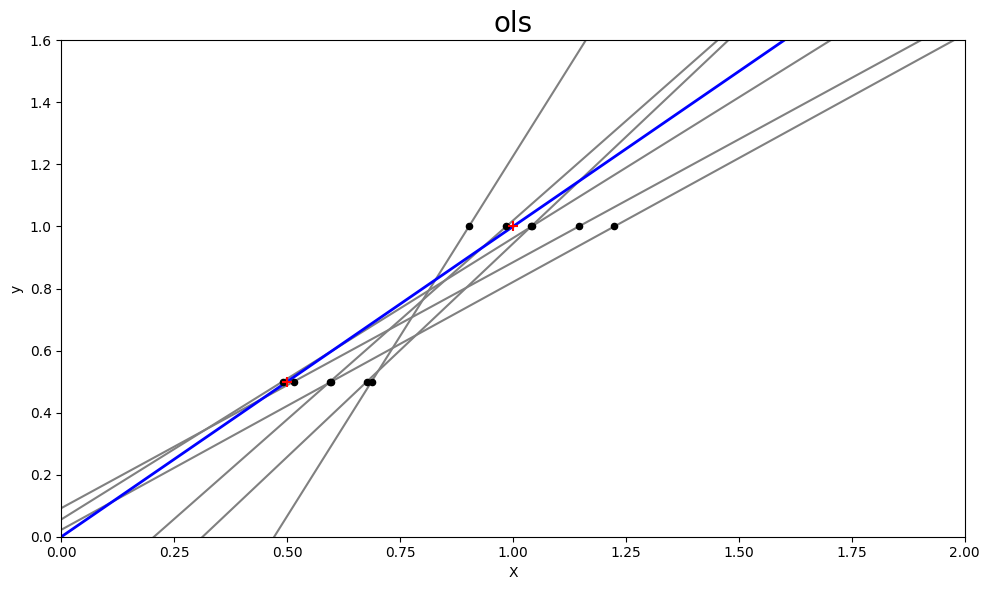

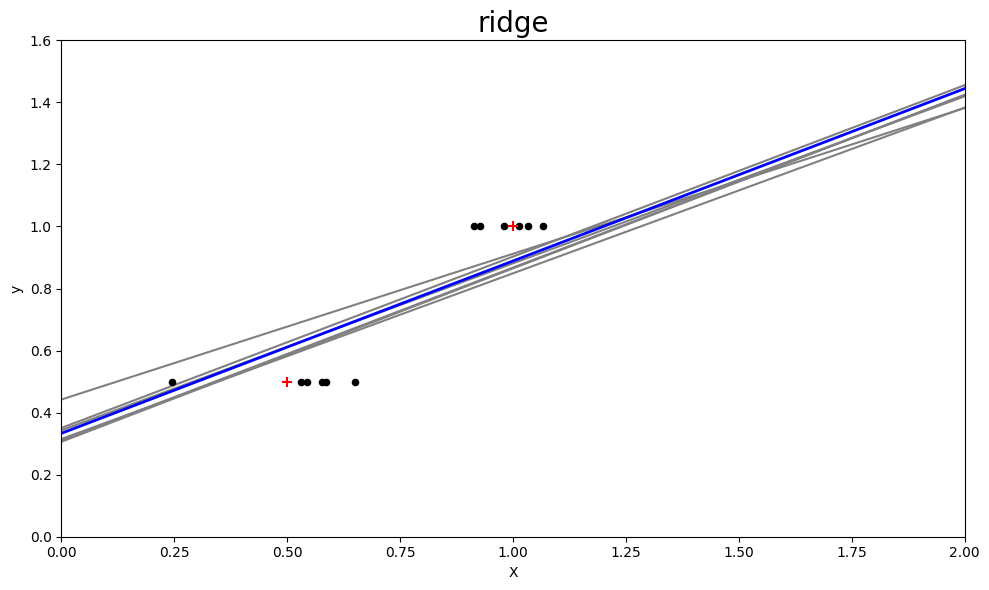

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

X_train = np.c_[0.5, 1].T
y_train = [0.5, 1]
X_test = np.c_[0, 2].T

np.random.seed(0)

classifiers = dict(ols=linear_model.LinearRegression(), ridge=linear_model.Ridge(alpha=0.1))

for name, clf in classifiers.items():
    fig, ax = plt.subplots(figsize=(10, 6))

    for _ in range(6):
        this_X = 0.1 * np.random.normal(size=(2, 1)) + X_train # z = mu + sigma * eps; where eps ~ N(0,1)
        clf.fit(this_X, y_train)

        ax.plot(X_test, clf.predict(X_test), color="gray")
        ax.scatter(this_X, y_train, s=20, c="black", marker="o", zorder=10) 
        # The higher the `zorder` value, the element will be drawn to the top. In this case, `zorder=10` is used to ensure that the data points are plotted above other elements 
        # on the graph.

    clf.fit(X_train, y_train)
    ax.plot(X_test, clf.predict(X_test), linewidth=2, color="blue")
    ax.scatter(X_train, y_train, s=50, c="red", marker="+", zorder=10)

    ax.set_title(name, fontsize=20)
    ax.set_xlim(0, 2)
    ax.set_ylim((0, 1.6))
    ax.set_xlabel("X")
    ax.set_ylabel("y")

    fig.tight_layout()

plt.show()

___
## **References:**

$[1].$ *Vũ Hữu Tiệp. Machine Learning cơ bản, Chapter 7 and 8, 2018.*

$[2].$ *Trường Đại học Khoa học Tự nhiên - ĐHQG TP.HCM, khoa Toán - Tin học. Nhập môn Khoa học dữ liệu module.*